In [380]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import joblib

%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



from lightgbm import LGBMRegressor
import lightgbm as lgb

np.random.seed(0)

In [381]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_wr.csv'
cities = current_path + '//data_mart//facts_cities_metrics.csv'
college = current_path + '//data_mart//facts_college_metrics.csv'

dimc_file = current_path + '//data_mart//dimensions_cities.csv'
dimco_file = current_path + '//data_mart//dimensions_colleges.csv'
dimp_file = current_path + '//data_mart//dimensions_players.csv'




print(dataset)
city_dim = pd.read_csv(dimc_file)
college_dim = pd.read_csv(dimco_file)
player_dim = pd.read_csv(dimp_file)

dataset = pd.read_csv(dataset)
college_df = pd.read_csv(college)
city_df = pd.read_csv(cities)


#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_wr.csv


In [382]:
for x in dataset.columns:
    print(x)
    #print(dataset[x].describe)
    #print('-----')

fms_id
espn_id
full_name
first_name
last_name
position
position_group
section
college
draft_year
selection_number
position_rank
position_group_rank
section_rank
drafting_team
home_city
home_state
home_country
college_weight_pounds
college_height_inches
hw_ratio
forty
vertical
bench
broad
threecone
shuttle
receiving_games
receiving_rec_td
receiving_rec_yards
receiving_receptions
receiving_scrim_plays
receiving_rec_td_pg
receiving_rec_yards_pg
receiving_receptions_pg
receiving_scrim_plays_pg
receiving_rec_td_pg_cf_scaled
receiving_rec_yards_pg_cf_scaled
receiving_receptions_pg_cf_scaled
receiving_scrim_plays_pg_cf_scaled
wr_college_weight_pounds_zscore
wr_college_height_inches_zscore
wr_hw_ratio_zscore
wr_forty_zscore
wr_vertical_zscore
wr_bench_zscore
wr_broad_zscore
wr_threecone_zscore
wr_shuttle_zscore
wr_receiving_rec_td_zscore
wr_receiving_rec_yards_zscore
wr_receiving_receptions_zscore
wr_receiving_scrim_plays_zscore
wr_receiving_rec_td_pg_zscore
wr_receiving_rec_yards_pg_zscore
wr

In [383]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'receiving_rec_td_pg', 'receiving_rec_yards_pg', 'receiving_receptions_pg', 'receiving_scrim_plays_pg', 'receiving_rec_td_pg_cf_scaled', 'receiving_rec_yards_pg_cf_scaled', 'receiving_receptions_pg_cf_scaled', 'receiving_scrim_plays_pg_cf_scaled', 'wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore', 'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore', 'wr_receiving_rec_td_pg_zscore', 'wr_receiving_rec_yards_pg_zscore', 'wr_receiving_receptions_pg_zscore', 'wr_receiving_scrim_plays_pg_zscore', 'wr_football_spending_zscore', 'wr_coaches_salaries_zscore', 'wr_ticket_sales_zscore', 'wr_receiving_rec_td_pg_cf_scaled_zscore', 'wr_receiving_rec_yards_pg_cf_scaled_zscore', 'wr_receiving_receptions_pg_cf_scaled_zscore', 'wr_receiving_scrim_plays_pg_cf_scaled_zscore', 'wr

In [384]:
#Deal with None Values
none_dict = {'espn_id': 0, 
    'conference':  'non_power_five',
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
             
    'receiving_rec_td_pg': dataset['receiving_rec_td_pg'].mean(), 
    'receiving_rec_yards_pg': dataset['receiving_rec_yards_pg'].mean(), 
    'receiving_receptions_pg': dataset['receiving_receptions_pg'].mean(), 
    'receiving_scrim_plays_pg': dataset['receiving_scrim_plays_pg'].mean(), 
    'receiving_rec_td_pg_cf_scaled': dataset['receiving_rec_td_pg_cf_scaled'].mean(), 
    'receiving_rec_yards_pg_cf_scaled': dataset['receiving_rec_yards_pg_cf_scaled'].mean(), 
    'receiving_receptions_pg_cf_scaled': dataset['receiving_receptions_pg_cf_scaled'].mean(), 
    'receiving_scrim_plays_pg_cf_scaled': dataset['receiving_scrim_plays_pg_cf_scaled'].mean(),
             
    
             
             
             
    'wr_football_spending_zscore': dataset['wr_football_spending_zscore'].mean(), 
    'wr_coaches_salaries_zscore': dataset['wr_coaches_salaries_zscore'].mean(), 
    'wr_ticket_sales_zscore': dataset['wr_ticket_sales_zscore'].mean(), 
#'wr_poverty_pct_zscore': dataset['wr_poverty_pct_zscore'].mean(), 
#'wr_med_income_zscore': dataset['wr_med_income_zscore'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'wr_forty_zscore': 0, 
    'wr_vertical_zscore': 0, 
    'wr_bench_zscore': 0, 
    'wr_broad_zscore': 0, 
    'wr_threecone_zscore': 0, 
    'wr_shuttle_zscore': 0, 
    
    'wr_max_madden_zscore': dataset['wr_max_madden_zscore'].min() - 0.1,
    'wr_receiving_rec_td_pg_zscore': 0, 
    'wr_receiving_rec_yards_pg_zscore': 0, 
    'wr_receiving_receptions_pg_zscore': 0, 
    'wr_receiving_rush_att_pg_zscore': 0, 
    'wr_receiving_rush_td_pg_zscore': 0, 
    'wr_receiving_rush_yds_pg_zscore': 0, 
    'wr_receiving_scrim_plays_pg_zscore': 0, 
    'wr_receiving_scrim_tds_pg_zscore': 0, 
    'wr_receiving_scrim_yds_pg_zscore': 0,
             
    'wr_receiving_rec_td_pg_cf_scaled_zscore': 0, 
    'wr_receiving_rec_yards_pg_cf_scaled_zscore': 0, 
             
             
             
    'wr_receiving_receptions_pg_cf_scaled_zscore':  0, 
    'wr_receiving_scrim_plays_pg_cf_scaled_zscore':  0,
             
    'wr_receiving_scrim_plays_pg_cf_scaled_zscore': 0, 
    'wr_receiving_scrim_tds_pg_cf_scaled_zscore': 0,
    'wr_receiving_scrim_yds_pg_cf_scaled_zscore': 0,
             
#wr_receiving_rec_td_pg_cf_scaled_zscore
#wr_receiving_rec_td_pg_cf_scaled_zscore
#wr_receiving_rec_td_pg_cf_scaled_zscore
    
    'wr_football_spending_zscore': 0, 
    'wr_coaches_salaries_zscore':  0, 
    'wr_ticket_sales_zscore':  0}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'conference': 'non_power_five', 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.511931385006354, 'vertical': 35.26238390092879, 'bench': 14.531806615776082, 'broad': 120.43402225755167, 'threecone': 6.97023622047244, 'shuttle': 4.220076628352491, 'receiving_rec_td_pg': 0.4400588148503304, 'receiving_rec_yards_pg': 55.90988487325946, 'receiving_receptions_pg': 3.7957006276847367, 'receiving_scrim_plays_pg': 4.090111085899776, 'receiving_rec_td_pg_cf_scaled': 0.38059213418186644, 'receiving_rec_yards_pg_cf_scaled': 48.39134726819287, 'receiving_receptions_pg_cf_scaled': 3.2830917852521404, 'receiving_scrim_plays_pg_cf_scaled': 3.5376432724018416, 'wr_football_spending_zscore': 0, 'wr_coaches_salaries_zscore': 0, 'wr_ticket_sales_zscore': 0, 'max_madden': 42.0, 'wr_forty_zscore': 0, 'wr_vertical_zscore': 0, 'wr_bench

In [385]:
#create categories for Madden Scores
def f(row):
    if row['max_madden'] >= 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    elif row['max_madden'] < 50 and row['max_madden'] >= 40 : val = 40
    else: val = 40
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)





"""

def f_avg_min(row):
    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12
    return avg_min

def f_avg_max(row):
    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12
    return avg_max

dataset['avg_min'] = dataset.apply(f_avg_min, axis=1)


dataset['avg_max'] = dataset.apply(f_avg_max, axis=1)
"""





"\n\ndef f_avg_min(row):\n    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12\n    return avg_min\n\ndef f_avg_max(row):\n    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12\n    return avg_max\n\ndataset['avg_min'] = dataset.apply(f_avg_min, axis=1)\n\n\ndataset['avg_max'] = dataset.apply(f_avg_max, axis=1)\n"

In [386]:
####REMOVE ALL NO MADDEN SCORES thru 2014 and keep all NO MADDEN SCORES 2015 forward
#determine % of no madden scores wanted
no_madden_percentage = .25

no_madden_df = dataset.loc[dataset['madden_cat'] == 40]
madden_df = dataset.loc[dataset['madden_cat'] != 40]

print(no_madden_df.shape)
print(madden_df.shape)

current_no_madden_percentage = no_madden_df.shape[0] / dataset.shape[0] - no_madden_percentage
print(current_no_madden_percentage)

for x in set(dataset['draft_year'].values):
    if x in [2015, 2016, 2017, 2018, 2019]:
        year_df = no_madden_df.loc[dataset['draft_year'] == x]
        madden_df = madden_df.append(year_df)


dataset = madden_df
print(dataset.shape)
dataset.head()
dataset = shuffle(dataset)
dataset.head()

#https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

(340, 93)
(471, 93)
0.16923551171393342
(512, 93)


,fms_id,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,...,wr_max_oct_zscore,wr_max_nov_zscore,wr_max_dec_zscore,wr_receiving_rec_td_pg_cf_scaled_zscore,wr_receiving_rec_yards_pg_cf_scaled_zscore,wr_receiving_receptions_pg_cf_scaled_zscore,wr_receiving_scrim_plays_pg_cf_scaled_zscore,wr_max_madden_zscore,max_madden,madden_cat
343,187,0.0,Andre Holmes,Andre,Holmes,WR,WR,O,Hillsdale,2011,...,-1.417096,-1.339197,-1.341301,0.000000,0.000000,0.000000,0.000000,0.247975,76.0,70
134,4797,0.0,Trent Taylor,Trent,Taylor,WR,WR,O,Louisiana Tech,2017,...,0.560703,0.521680,0.475756,0.306753,0.526477,1.016898,0.721914,0.247975,76.0,70
50,567,3123075.0,Braxton Berrios,Braxton,Berrios,WR,WR,O,Miami,2018,...,1.833045,2.075710,2.219149,-0.558207,-1.491353,-1.119357,-1.141327,-0.390256,70.0,70
59,1156,552330.0,Daesean Hamilton,Daesean,Hamilton,WR,WR,O,Penn State,2018,...,-1.316317,-1.081842,-1.038459,-0.237026,0.267003,0.593344,0.482170,-0.071140,73.0,70
473,1379,0.0,Davone Bess,Davone,Bess,WR,WR,O,Hawaii,2008,...,1.996812,2.432048,2.710246,1.859164,0.963044,1.667246,1.320872,0.460718,78.0,70


In [387]:
dataset.columns[20:]

Index(['hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_scrim_plays', 'receiving_rec_td_pg',
       'receiving_rec_yards_pg', 'receiving_receptions_pg',
       'receiving_scrim_plays_pg', 'receiving_rec_td_pg_cf_scaled',
       'receiving_rec_yards_pg_cf_scaled', 'receiving_receptions_pg_cf_scaled',
       'receiving_scrim_plays_pg_cf_scaled', 'wr_college_weight_pounds_zscore',
       'wr_college_height_inches_zscore', 'wr_hw_ratio_zscore',
       'wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_zscore', 'wr_receiving_rec_yards_zscore',
       'wr_receiving_receptions_zscore', 'wr_receiving_scrim_plays_zscore',
       'wr_receiving_rec_td_pg_zscore', 'wr_receiving_rec_yards_pg_zscore',
       'wr_receiving_receptions_pg_zscore',
       'wr_rece

In [388]:

#Total Features
"""['espn_id', 'fms_college_id', 'fms_city_id', 'full_name',
       'first_name', 'last_name', 'position', 'position_group', 'section',
       'college', 'conference', 'draft_year', 'selection_number',
       'position_rank', 'position_group_rank', 'section_rank', 'drafting_team',
       'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_scrim_plays', 'receiving_rec_td_pg',
       'receiving_rec_yards_pg', 'receiving_receptions_pg',
       'receiving_scrim_plays_pg', 'receiving_rec_td_pg_cf_scaled',
       'receiving_rec_yards_pg_cf_scaled', 'receiving_receptions_pg_cf_scaled',
       'receiving_scrim_plays_pg_cf_scaled', 'wr_college_weight_pounds_zscore',
       'wr_college_height_inches_zscore', 'wr_hw_ratio_zscore',
       'wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_zscore', 'wr_receiving_rec_yards_zscore',
       'wr_receiving_receptions_zscore', 'wr_receiving_scrim_plays_zscore',
       'wr_receiving_rec_td_pg_zscore', 'wr_receiving_rec_yards_pg_zscore',
       'wr_receiving_receptions_pg_zscore',
       'wr_receiving_scrim_plays_pg_zscore', 'wr_football_spending_zscore',
       'wr_coaches_salaries_zscore', 'wr_ticket_sales_zscore',
       'wr_ann_rain_inch_zscore', 'wr_ann_snow_inch_zscore',
       'wr_min_jan_zscore', 'wr_min_feb_zscore', 'wr_min_mar_zscore',
       'wr_min_apr_zscore', 'wr_min_may_zscore', 'wr_min_jun_zscore',
       'wr_min_jul_zscore', 'wr_min_aug_zscore', 'wr_min_sep_zscore',
       'wr_min_oct_zscore', 'wr_min_nov_zscore', 'wr_min_dec_zscore',
       'wr_max_jan_zscore', 'wr_max_feb_zscore', 'wr_max_mar_zscore',
       'wr_max_apr_zscore', 'wr_max_may_zscore', 'wr_max_jun_zscore',
       'wr_max_jul_zscore', 'wr_max_aug_zscore', 'wr_max_sep_zscore',
       'wr_max_oct_zscore', 'wr_max_nov_zscore', 'wr_max_dec_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_receiving_receptions_pg_cf_scaled_zscore',
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore', 'wr_max_madden_zscore',
       'max_madden', 'madden_cat']"""





# 'college_weight_pounds', 'college_height_inches'


features = ['college_weight_pounds', 'college_height_inches', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds', 'receiving_seasons', 'ann_rain_inch', 'ann_snow_inch',
       'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec']

z_features = ['wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore',
       'wr_college_weight_pounds_zscore', 'wr_college_height_inches_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_ann_rain_inch_zscore', 
       'wr_receiving_receptions_pg_cf_scaled_zscore', 
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore']



"""
z_features = ['wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore',
       'wr_hw_ratio_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_ann_rain_inch_zscore',
       'wr_receiving_receptions_pg_cf_scaled_zscore', 
       'wr_threecone_zscore',
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore',
       'wr_college_height_inches_zscore' ]
       
       
       
       'wr_bench_zscore',
'wr_forty_zscore',
'wr_hw_ratio_zscore',
'wr_receiving_scrim_plays_zscore',
'wr_receiving_rec_yards_pg_cf_scaled_zscore',
'wr_receiving_rec_td_zscore',
'wr_shuttle_zscore',
'wr_vertical_zscore',
'wr_receiving_scrim_plays_pg_cf_scaled_zscore',
'wr_receiving_receptions_pg_cf_scaled_zscore',
'wr_ann_rain_inch_zscore',
'wr_threecone_zscore',
'wr_ticket_sales_zscore',
'wr_broad_zscore'


"""


"\nz_features = ['wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',\n       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',\n       'wr_receiving_rec_td_pg_cf_scaled_zscore',\n       'wr_hw_ratio_zscore',\n       'wr_receiving_rec_yards_pg_cf_scaled_zscore',\n       'wr_ann_rain_inch_zscore',\n       'wr_receiving_receptions_pg_cf_scaled_zscore', \n       'wr_threecone_zscore',\n       'wr_receiving_scrim_plays_pg_cf_scaled_zscore',\n       'wr_college_height_inches_zscore' ]\n       \n       \n       \n       'wr_bench_zscore',\n'wr_forty_zscore',\n'wr_hw_ratio_zscore',\n'wr_receiving_scrim_plays_zscore',\n'wr_receiving_rec_yards_pg_cf_scaled_zscore',\n'wr_receiving_rec_td_zscore',\n'wr_shuttle_zscore',\n'wr_vertical_zscore',\n'wr_receiving_scrim_plays_pg_cf_scaled_zscore',\n'wr_receiving_receptions_pg_cf_scaled_zscore',\n'wr_ann_rain_inch_zscore',\n'wr_threecone_zscore',\n'wr_ticket_sales_zscore',\n'wr_broad_zscore'\n\n\n"

#Create by game by conference per game stats
def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            
#{'acc', 'big_10', 'big_12', 'mountain_west', 'non_power_five', 'pac_12', 'sec'}
            if   row['conference'] == 'sec':  row[stat] = row[stat]/row['rushing_games'] * 1
            elif row['conference'] == 'acc':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_10':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'pac_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'mountain_west':  row[stat] = row[stat]/row['rushing_games'] * .75
            elif row['conference'] == 'non_power_five':  row[stat] = row[stat]/row['rushing_games'] * .6
        
            
            
    return row


#use by game stats?
game_averages = 'Y'
if game_averages == 'Y':
    dataset = dataset.apply(game_avg, axis=1)
else: pass

df_list = []
mean_list = []
std_list = []
col_list = []
for col in dataset[features].columns:
    col_list.append(col)
    mean_list.append(dataset[col].mean())
    std_list.append(dataset[col].std())
df_list.append(mean_list)
df_list.append(std_list)

df_mean_std = pd.DataFrame(df_list, columns=col_list, index = ['mean', 'std'])
df_mean_std.to_csv('rb_mean_std_features.csv')

In [389]:
#select year to hold out
holdout_year = 2015
#pick features from above
features_list = z_features




#z_score features
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden'].values)

#for col in dataset[features_list].columns:
#    dataset[col] = stats.zscore(dataset[col].values)



#prediction feature
#prediction_feature = 'max_madden'
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden_zscore'].values)
#max_mean = dataset['max_madden'].mean()
#max_std = dataset['max_madden'].std()
#prediction_feature = 'max_madden'

prediction_feature = 'madden_cat'
features_list.append(prediction_feature)






#create a train and test df based on the hold out year
test_basis = 'hold_out'
if test_basis == 'hold_out':
    test_df = dataset.loc[dataset['draft_year'] == holdout_year]
    train_df = dataset.loc[dataset['draft_year'] != holdout_year]

if test_basis != 'hold_out':
    dataset = shuffle(dataset)
    split= .9
    train_df = dataset[:int(dataset.shape[0]*split)]
    test_df = dataset[int(dataset.shape[0]*split):]


#shuffle the dataset
test_df = shuffle(test_df)
train_df = shuffle(train_df)

#create a copy of the dataset with that feature set
test_df_feat = test_df[features_list].copy()
train_df_feat = train_df[features_list].copy()

In [390]:
X_train, Y_train = train_df_feat[:].drop([prediction_feature], axis =1), train_df_feat.pop(prediction_feature)
X_validation, Y_validation = test_df_feat[:].drop([prediction_feature], axis =1), test_df_feat.pop(prediction_feature)

In [391]:
   # Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    #top_bottom_10 = feature_coef.sort_values()
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
def print_results(true_val, predict_val):
    print('Accuracy:  ' + str(accuracy_score(true_val, predict_val)))
    print('R2 : ' + str(r2_score(true_val, predict_val)))
    print('MSE : ' + str(mean_squared_error(true_val, predict_val)))
    

def plot_confusion(mat, model):
    
    array = mat
    df_cm = pd.DataFrame(array, index = [i for i in class_names],
                      columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    plt.title(model)
    sn.heatmap(df_cm, annot=True, cmap="Blues")


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    
    
class_names = sorted(list(set(dataset[prediction_feature].values)))

In [392]:
sorted(list(set(dataset[prediction_feature].values)))

[40, 50, 60, 70, 80, 90]

In [393]:
result_df = test_df[['full_name', prediction_feature, 'position_group_rank']].copy()
print(result_df)
def result_df_viz(df, predictions, model_name):
    
    df[model_name] = predictions
    
    return df

                full_name  madden_cat  position_group_rank
214           Titus Davis          60                 39.0
196         Dres Anderson          60                 34.0
189        DeAndrew White          60                 31.0
210          Rannell Hall          60                 38.0
213          Stefon Diggs          90                 19.0
183            Cam Worthy          40                 27.0
186         Darren Waller          60                 24.0
211         Rashad Greene          70                 18.0
182      Breshad Perriman          70                  5.0
206           Kevin White          70                  2.0
215          Tony Lippett          40                 20.0
199         Jaelen Strong          70                 11.0
195  Dorial Green-Beckham          70                  8.0
203           Kaelin Clay          60                 22.0
212         Sammie Coates          70                 13.0
218           Vince Mayle          70                 17

Accuracy:  0.5641025641025641
R2 : 0.3547052740434331
MSE : 82.05128205128206
AdaBoostRegressor model picked 13 out of 13 features
Index(['AdaBoost'], dtype='object')









































,full_name,AdaBoost,madden_cat,position_group_rank
188,DeAndre Smelter,80.0,60,30.0
213,Stefon Diggs,80.0,90,19.0
180,Amari Cooper,80.0,90,1.0
206,Kevin White,80.0,70,2.0
214,Titus Davis,70.0,60,39.0
217,Tyler Lockett,70.0,80,10.0
209,Phillip Dorsett,70.0,70,6.0
184,Chris Conley,70.0,70,12.0
193,Devin Funchess,70.0,80,9.0
216,Ty Montgomery,70.0,70,14.0


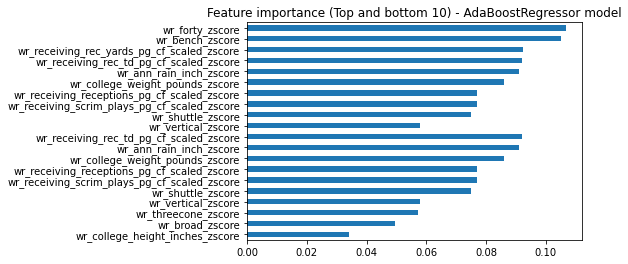

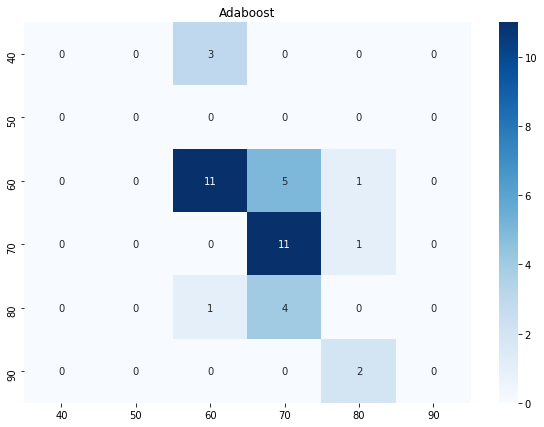

In [394]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=100, loss='linear', learning_rate=1, random_state=1)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)

print_results(Y_validation, madden_predict)
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')
mat = confusion_matrix(Y_validation, madden_predict, labels = class_names)

plot_confusion(mat, 'Adaboost')
result_df_viz(result_df, madden_predict, 'AdaBoost')
from scipy.stats import rankdata
print(result_df.columns[3:])
rank_df = result_df[result_df.columns[3:]]

def rank(row):
    print()
    return row.sum()/len(row)
result_df['rank'] = rank_df.apply(rank, axis=1)
ordered_df = result_df[['full_name', 'AdaBoost', prediction_feature, 'position_group_rank']].sort_values(by=['AdaBoost'], ascending=False)
ordered_df



In [396]:

feature_coef = pd.Series(index=X_validation.columns, data=adaboostregressor.feature_importances_)
feature_coef  = feature_coef.sort_values(ascending=False)
print(feature_coef.index)
feature_coef.to_csv('wr_feature_importances.csv')

Index(['wr_forty_zscore', 'wr_bench_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore', 'wr_ann_rain_inch_zscore',
       'wr_college_weight_pounds_zscore',
       'wr_receiving_receptions_pg_cf_scaled_zscore',
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore', 'wr_shuttle_zscore',
       'wr_vertical_zscore', 'wr_threecone_zscore', 'wr_broad_zscore',
       'wr_college_height_inches_zscore'],
      dtype='object')


In [ ]:
ordered_df.to_csv('wr_rank_of_picks.csv')
file_name = 'wr_model.pkl'
joblib.dump(adaboostregressor, file_name)



#https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models